In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import glob


In [76]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [77]:
path =r'C:\Users\osutr_000\Documents\tennis_atp-master' # use your path
allFiles = glob.glob(path + "/*.csv")
matches = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, encoding='ISO-8859-1')
    list_.append(df)
matches = pd.concat(list_)
matches['winner']=np.random.randint(1,3,matches.shape[0])


In [78]:
#list(matches)
#matches.sort_values('tourney_date',ascending=True)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
33,1968-580,Australian Chps.,Grass,64,G,19680119,34,100101,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
34,1968-580,Australian Chps.,Grass,64,G,19680119,35,100025,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
36,1968-580,Australian Chps.,Grass,64,G,19680119,37,100013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
37,1968-580,Australian Chps.,Grass,64,G,19680119,38,100174,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
38,1968-580,Australian Chps.,Grass,64,G,19680119,39,100114,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
39,1968-580,Australian Chps.,Grass,64,G,19680119,40,109775,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
40,1968-580,Australian Chps.,Grass,64,G,19680119,41,100203,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
41,1968-580,Australian Chps.,Grass,64,G,19680119,42,107383,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
42,1968-580,Australian Chps.,Grass,64,G,19680119,43,100090,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [79]:
hard_court = matches[(matches.surface=='Hard')]
hard_court = matches[['winner_rank','winner_seed','winner_age','winner_ioc','winner_hand','loser_rank','loser_seed',
                    'loser_age','loser_ioc','loser_hand','tourney_date','winner',]].fillna("")
#hard_court.sort_values('tourney_date',ascending=True)

,winner_rank,winner_seed,winner_age,winner_ioc,winner_hand,loser_rank,loser_seed,loser_age,loser_ioc,loser_hand,tourney_date,winner
0,,,,AUS,R,,,,AUS,R,19680119,2
33,,12,22.5572,CAN,R,,,,AUS,R,19680119,1
34,,3,30.5298,AUS,R,,,,AUS,R,19680119,1
36,,,34.2943,AUS,L,,,18.7023,AUS,R,19680119,2
37,,10,18.9487,ESP,L,,,,AUS,R,19680119,1
38,,2,21.8261,AUS,R,,,,USA,R,19680119,1
39,,,32.1588,GBR,R,,14,,IND,R,19680119,2
40,,7,17.9274,AUS,R,,,26.8912,AUS,R,19680119,1
41,,,,AUS,R,,11,22.1766,GBR,R,19680119,1
42,,4,23.3347,AUS,R,,,19.1321,AUS,R,19680119,1


In [80]:
df1a = pd.DataFrame(hard_court[hard_court.winner==1])
df1a.columns = ['p1_rank','p1_seed','p1_age','p1_ioc','p1_hand','p2_rank','p2_seed','p2_age','p2_ioc','p2_hand','date','winner']
#df1a.sort_values('date',ascending=True)

,p1_rank,p1_seed,p1_age,p1_ioc,p1_hand,p2_rank,p2_seed,p2_age,p2_ioc,p2_hand,date,winner
1,,,27.5209,AUS,R,,,,AUS,R,19680119,1
38,,2,21.8261,AUS,R,,,,USA,R,19680119,1
40,,7,17.9274,AUS,R,,,26.8912,AUS,R,19680119,1
41,,,,AUS,R,,11,22.1766,GBR,R,19680119,1
42,,4,23.3347,AUS,R,,,19.1321,AUS,R,19680119,1
43,,,22.0205,AUS,R,,,20.1561,JPN,R,19680119,1
45,,9,25.7906,ESP,R,,,,AUS,R,19680119,1
37,,10,18.9487,ESP,L,,,,AUS,R,19680119,1
48,,3,30.5298,AUS,R,,,34.0014,AUS,R,19680119,1
53,,9,25.7906,ESP,R,,8,22.0041,AUS,R,19680119,1


In [81]:
df1b = pd.DataFrame(hard_court[hard_court.winner==2])
df1b.columns = ['p2_rank','p2_seed','p2_age','p2_ioc','p2_hand','p1_rank','p1_seed','p1_age','p1_ioc','p1_hand','date','winner']
#df1b.sort_values('date',ascending=True)

,p2_rank,p2_seed,p2_age,p2_ioc,p2_hand,p1_rank,p1_seed,p1_age,p1_ioc,p1_hand,date,winner
0,,,,AUS,R,,,,AUS,R,19680119,2
58,,1,24.0684,AUS,R,,3,30.5298,AUS,R,19680119,2
56,,2,21.8261,AUS,R,,7,17.9274,AUS,R,19680119,2
52,,4,23.3347,AUS,R,,,22.0205,AUS,R,19680119,2
51,,7,17.9274,AUS,R,,,,AUS,R,19680119,2
49,,10,18.9487,ESP,L,,,34.2943,AUS,L,19680119,2
47,,12,22.5572,CAN,R,,5,22.2642,AUS,R,19680119,2
46,,1,24.0684,AUS,R,,,16.2163,AUS,R,19680119,2
39,,,32.1588,GBR,R,,14,,IND,R,19680119,2
36,,,34.2943,AUS,L,,,18.7023,AUS,R,19680119,2


In [83]:
df2 = pd.concat([df1a,df1b])
df2.sort_index()

,date,p1_age,p1_hand,p1_ioc,p1_rank,p1_seed,p2_age,p2_hand,p2_ioc,p2_rank,p2_seed,winner
0,19890828,29.4757,R,USA,1,1,27.5483,R,URU,127,,1
0,20080107,21.5551,R,FRA,8,1,24.4846,R,RUS,34,,1
0,20091005,25.8535,R,FRA,189,,21.0322,R,ARG,5,1,1
0,20140106,23.2553,L,ARG,54,,24.4572,L,USA,96,,2
0,20120730,30.6393,R,USA,15,1,32.8214,R,GER,77,,1
0,20151005,30.5216,R,SUI,4,1,36.8542,R,CZE,255,,1
0,20160104,25.0212,R,CAN,14,4,34.4066,R,SUI,3,1,1
0,19930802,23.1075,R,CZE,310,,22.5435,R,ESP,5,1,2
0,19720305,24.5749,R,HUN,,,25.2238,R,USA,,,2
0,19730617,26.0589,R,GBR,,,29.3169,R,NED,,,2


In [ ]:
#cols = df1b.columns.tolist()
#cols = cols[5:10] + cols[0:5] + cols[-2:]
#df1b = df1b[cols]
#len(df1b.index)

In [84]:
df2.p1_ioc.unique()

array(['AUS', 'CAN', 'JPN', 'GBR', 'ESP', 'USA', 'RSA', 'ECU', 'CRO',
       'FRA', 'CHI', 'PHI', 'ARG', 'BRA', 'UNK', 'IRL', 'GER', 'IND',
       'ITA', 'DEN', 'MEX', 'NED', 'VEN', 'HUN', 'RUS', 'CZE', 'ROU',
       'COL', 'UKR', 'BEL', 'SUI', 'POL', 'GRE', 'EGY', 'SRB', 'PER',
       'BUL', 'FIN', 'SRI', 'LUX', 'NOR', 'MAS', 'NZL', 'ISR', 'ZIM',
       'SWE', 'JAM', 'AUT', 'MON', 'CAR', 'POR', 'VIE', 'KOR', 'PAK',
       'TUR', 'IRI', 'MAR', 'URS', 'INA', 'SEN', 'CRC', 'PAR', 'BOL',
       'NGR', 'YUG', 'URU', 'ALG', 'BAH', 'TPE', 'CHN', 'PUR', 'THA',
       'HKG', 'SVK', 'TUN', 'CYP', 'CUB', 'CIV', 'MLT', 'KEN', 'IRQ',
       'BAN', 'GHA', 'CMR', 'KUW', 'JOR', 'LAT', 'ESA', 'BRN', 'ZAM',
       'DOM', 'ECA', 'SIN', 'TOG', 'SLO', 'GUA', 'UZB', 'ARM', 'BLR',
       'HAI', 'EST', 'LTU', 'KSA', 'MKD', 'GEO', 'LIB', 'QAT', 'KAZ',
       'AHO', 'SYR', 'MDA', 'TJK', 'AND', 'BIH', 'SAM', 'SOL', 'MHL',
       'OMA', 'MNE', 'BAR', 'BEN', 'MAD', 'RHO', 'UAE', 'NIG', 'BER',
       'BUR', 'LBA',

In [102]:
cleanup_nums = {"p1_hand":     {"R": -1, "L": 1, "U": -1},
                "p2_hand":     {"R":-1, "L": 1, "U": -1},
               }
df2.replace(cleanup_nums, inplace=True)
df2.head()

,date,p1_age,p1_hand,p1_ioc,p1_rank,p1_seed,p2_age,p2_hand,p2_ioc,p2_rank,p2_seed,winner
1,19680119,27.520876,-1,AUS,NaN,NaN,NaN,-1,AUS,NaN,NaN,1
2,19680119,16.216290,-1,AUS,NaN,NaN,NaN,-1,INA,NaN,15.0,1
3,19680119,22.264203,-1,AUS,NaN,5.0,NaN,-1,AUS,NaN,NaN,1
6,19680119,22.557153,-1,CAN,NaN,12.0,NaN,-1,AUS,NaN,NaN,1
10,19680119,20.301164,-1,JPN,NaN,16.0,NaN,-1,AUS,NaN,NaN,1


In [103]:
df2['p1_hand'].value_counts()

-1    140727
1      22813
          37
Name: p1_hand, dtype: int64

In [104]:
df2 = df2.apply(pd.to_numeric, errors='ignore')
df2.dtypes

date         int64
p1_age     float64
p1_hand    float64
p1_ioc      object
p1_rank    float64
p1_seed    float64
p2_age     float64
p2_hand    float64
p2_ioc      object
p2_rank    float64
p2_seed    float64
winner       int32
dtype: object

In [105]:
bracket = pd.DataFrame.from_csv('data/us_open_bracket.csv', index_col=None, encoding='ISO-8859-1')
ranking = pd.DataFrame.from_csv('data/atp_rankings.csv', index_col=0, encoding='ISO-8859-1')

In [106]:
rankings = df2[['p1_rank','p2_rank']]
seeds = df2[['p1_seed','p2_seed']]
ages = df2[['p1_age','p2_age']]

In [132]:
df3 = pd.DataFrame()
df3['age_delta'] = (df2.p1_age - df2.p2_age)
df3['seed_delta'] = (df2.p1_seed - df2.p2_seed)
df3['hand_delta'] = (df2.p1_hand - df2.p2_hand)
df3['min_age'] = ages.min(axis=1)
df3['min_seeds'] = seeds.min(axis=1)
df3['min_rank'] = rankings.min(axis=1)
df3['winner'] = df2.winner
len(df3.index)

163577

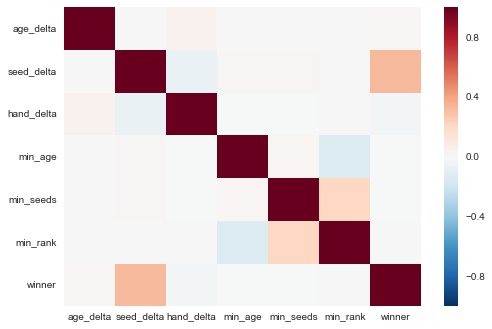

In [129]:
import seaborn as sns
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [133]:
df4=df3.dropna()
len(df4)

11540

In [134]:
# Split the data into a training and test set.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df4[['age_delta','seed_delta','hand_delta','min_age','min_seeds','min_rank']].values, 
                                              (df4.winner == 1).values)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xtrain, Ytrain)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtest), Ytest))

0.659618717504


In [139]:
score_list=[]
Cs = [0.01, 0.1, 1, 10, 100]

for c in Cs:
    clf = sklearn.svm.SVC( C=c).fit(Xtrain, Ytrain)
    score_list.append(clf.score(Xtest, Ytest))
print(score_list)

[0.50849220103986137, 0.6107452339688042, 0.63119584055459277, 0.59064124783362215, 0.57365684575389952]
